Training a pre-trained VGG16 to recognize the chess pieces

In [13]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import itertools
from keras.applications.vgg16 import VGG16
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
prefix="./dataset/chessv"
train_path=f"{prefix}/train"
validate_path=f"{prefix}/validate"
test_path=f"{prefix}/test"

In [3]:
class_labels =  [   "white_pawn", "white_knight", "white_bishop", "white_rook", "white_queen", "white_king",
                    "black_pawn", "black_knight", "black_bishop", "black_rook", "black_queen", "black_king",
                    "blank", 
                ]

In [10]:
train_batch=ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=class_labels, batch_size=64)
validate_batch=ImageDataGenerator().flow_from_directory(validate_path, target_size=(224, 224), classes=class_labels, batch_size=8)
test_batch=ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=class_labels, batch_size=64)

Found 512 images belonging to 13 classes.
Found 512 images belonging to 13 classes.
Found 64 images belonging to 13 classes.


In [5]:
pretrained = VGG16()
model = keras.models.Sequential()
map(model.add, pretrained.layers[:-1])
for x in pretrained.layers[:-1]:
    x.trainable = False
    model.add(x)
model.add(Dense(13, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [6]:
model.compile(Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit_generator(train_batch, steps_per_epoch=8, epochs=5, validation_data=validate_batch, validation_steps=64, verbose=2)

C:\Users\Charles\AppData\Local\Temp\ipykernel_340924\216266962.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_batch, steps_per_epoch=8, epochs=5, validation_data=validate_batch, validation_steps=64, verbose=2)


Epoch 1/5
8/8 - 702s - loss: 3.2994 - accuracy: 0.0703 - val_loss: 2.6705 - val_accuracy: 0.1660 - 702s/epoch - 88s/step
Epoch 2/5
8/8 - 681s - loss: 2.4132 - accuracy: 0.2598 - val_loss: 2.1325 - val_accuracy: 0.3789 - 681s/epoch - 85s/step
Epoch 3/5
8/8 - 684s - loss: 1.9665 - accuracy: 0.4473 - val_loss: 1.7558 - val_accuracy: 0.4902 - 684s/epoch - 86s/step
Epoch 4/5
8/8 - 685s - loss: 1.6329 - accuracy: 0.5117 - val_loss: 1.4834 - val_accuracy: 0.5488 - 685s/epoch - 86s/step
Epoch 5/5
8/8 - 680s - loss: 1.4088 - accuracy: 0.5762 - val_loss: 1.3018 - val_accuracy: 0.6055 - 680s/epoch - 85s/step


Seems that it could benefit from more iterations.

In [7]:
model.fit_generator(train_batch, steps_per_epoch=8, epochs=3, validation_data=validate_batch, validation_steps=64, verbose=2)

C:\Users\Charles\AppData\Local\Temp\ipykernel_340924\1292936048.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_batch, steps_per_epoch=8, epochs=3, validation_data=validate_batch, validation_steps=64, verbose=2)


Epoch 1/3
8/8 - 679s - loss: 1.2470 - accuracy: 0.6133 - val_loss: 1.1612 - val_accuracy: 0.6426 - 679s/epoch - 85s/step
Epoch 2/3
8/8 - 661s - loss: 1.1190 - accuracy: 0.6582 - val_loss: 1.0486 - val_accuracy: 0.6797 - 661s/epoch - 83s/step
Epoch 3/3
8/8 - 1836s - loss: 1.0150 - accuracy: 0.7051 - val_loss: 0.9565 - val_accuracy: 0.7188 - 1836s/epoch - 229s/step


In [8]:
model.fit(train_batch, steps_per_epoch=8, epochs=5, validation_data=validate_batch, validation_steps=64, verbose=2)

Epoch 1/5
8/8 - 681s - loss: 0.9299 - accuracy: 0.7305 - val_loss: 0.8793 - val_accuracy: 0.7363 - 681s/epoch - 85s/step
Epoch 2/5
8/8 - 688s - loss: 0.8565 - accuracy: 0.7500 - val_loss: 0.8107 - val_accuracy: 0.7773 - 688s/epoch - 86s/step
Epoch 3/5
8/8 - 674s - loss: 0.7950 - accuracy: 0.7812 - val_loss: 0.7539 - val_accuracy: 0.7969 - 674s/epoch - 84s/step
Epoch 4/5
8/8 - 684s - loss: 0.7353 - accuracy: 0.7930 - val_loss: 0.7010 - val_accuracy: 0.8086 - 684s/epoch - 86s/step
Epoch 5/5
8/8 - 672s - loss: 0.6866 - accuracy: 0.8125 - val_loss: 0.6545 - val_accuracy: 0.8340 - 672s/epoch - 84s/step


In [9]:
model.fit(train_batch, steps_per_epoch=8, epochs=5, validation_data=validate_batch, validation_steps=64, verbose=2)

Epoch 1/5
8/8 - 682s - loss: 0.6399 - accuracy: 0.8320 - val_loss: 0.6126 - val_accuracy: 0.8359 - 682s/epoch - 85s/step
Epoch 2/5
8/8 - 680s - loss: 0.6008 - accuracy: 0.8359 - val_loss: 0.5745 - val_accuracy: 0.8496 - 680s/epoch - 85s/step
Epoch 3/5
8/8 - 679s - loss: 0.5645 - accuracy: 0.8496 - val_loss: 0.5406 - val_accuracy: 0.8516 - 679s/epoch - 85s/step
Epoch 4/5
8/8 - 677s - loss: 0.5305 - accuracy: 0.8555 - val_loss: 0.5100 - val_accuracy: 0.8633 - 677s/epoch - 85s/step
Epoch 5/5
8/8 - 689s - loss: 0.5029 - accuracy: 0.8652 - val_loss: 0.4814 - val_accuracy: 0.8828 - 689s/epoch - 86s/step


In [16]:
predictions = model.predict_generator(test_batch, steps=1, verbose=0)

C:\Users\Charles\AppData\Local\Temp\ipykernel_340924\1508928653.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_batch, steps=1, verbose=0)


In [25]:
def plot_confusion_map(cm, classes, normalize=False, title="confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    print(cm)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0], cm.shape[1])):
        plt.text(j, i, cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


Confusion matrix without normalization
[[ 2  0  0  0  1  0  0  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  1  0  0  0  0  1  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 3  1  1  0  1  1  6  1  1  0  0  0 15]]


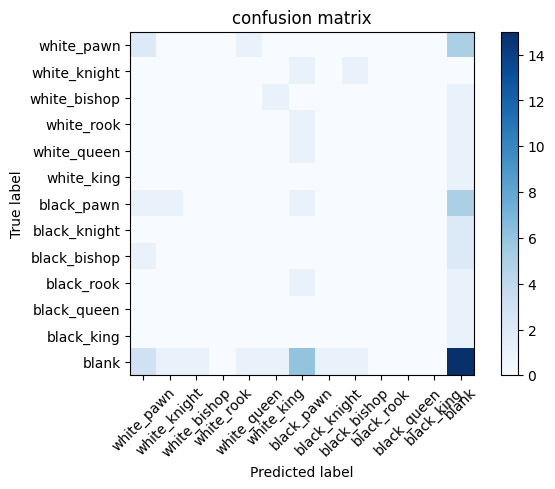

In [26]:
t_images, t_data = next(test_batch)
p_map = [ max([(v, i) for i, v in enumerate(r)])[1] for r in predictions ]
t_map = [ max([(v, i) for i, v in enumerate(r)])[1] for r in t_data ]
cm = confusion_matrix(t_map, p_map)
plot_confusion_map(cm, class_labels)